In [0]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in /usr/local/lib/python3.6/dist-packages (0.0)


In [0]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [0]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [2]:
from google.colab import files
uploaded = files.upload()

Saving exoplanet_data.csv to exoplanet_data (1).csv


In [54]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
len(df)

6991

# Select your features (columns)

In [4]:
# Set target, features and feature_names.
target = df["koi_disposition"]
data = df.drop("koi_disposition", axis=1)
feature_names = data.columns
data.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443,9.11,2.87,-1.62,25.8,2,5455,81,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638,39.30,31.04,-10.49,76.3,1,5853,158,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395,891.96,668.95,-230.35,505.6,1,5805,157,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406,926.16,874.33,-314.24,40.9,1,6031,169,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,0.762,0.139,-0.532,3.14020,0.06730,-0.06730,686.0,18.7,-18.7,2.77,0.90,-0.30,1160,427.65,420.33,-136.70,40.2,2,6046,189,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Create a Train Test Split

Use `koi_disposition` for the y values

In [0]:
#libraries
import matplotlib.pyplot as plt#visualization
%matplotlib inline
import seaborn as sns#visualization
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from plotly.offline import iplot
import plotly.graph_objs as go

In [6]:
#labels
lab = df["koi_disposition"].value_counts().keys().tolist()
#values
val = df["koi_disposition"].value_counts().values.tolist()
print("lab :",lab)
print("val :",val)

lab : ['FALSE POSITIVE', 'CONFIRMED', 'CANDIDATE']
val : [3504, 1800, 1687]


In [0]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [8]:
enable_plotly_in_cell()
trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime','red'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "koi data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

Output hidden; open in https://colab.research.google.com to view.

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [0]:
#before i split the data, I want to see if the dataset is imbalanced or the distribution of the selected features if there is any anomaly
y = df["koi_disposition"].values.reshape(-1, 1)
target_names = ["CONFIRMED", "FALSE POSITIVE","CANDIDATE"]

In [6]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(data,encoded_y, random_state=np.random)

In [33]:
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
2957,0,0,0,0,5.943735,0.000030,-0.000030,135.25897,0.00432,-0.00432,0.1970,0.2790,-0.1970,1.847,0.124,-0.124,301.0,25.4,-25.4,1.14,0.06,-0.10,674,48.82,10.68,-12.84,13.2,1,4391,118,-131,4.598,0.053,-0.018,0.682,0.032,-0.060,294.62097,49.894150,15.583
6099,0,0,0,0,377.501257,0.008770,-0.008770,278.83750,0.01640,-0.01640,0.0330,0.4260,-0.0330,11.980,0.595,-0.595,541.4,46.0,-46.0,2.16,0.32,-0.10,242,0.81,0.31,-0.11,13.9,1,5751,78,-78,4.508,0.021,-0.119,0.940,0.138,-0.043,285.64090,47.811050,15.044
1032,0,0,0,0,63.073224,0.000287,-0.000287,191.25320,0.00354,-0.00354,0.7460,0.1840,-0.5330,5.397,0.122,-0.122,671.3,25.5,-25.5,17.80,4.46,-8.91,1077,317.78,202.95,-242.18,30.0,1,6234,74,-74,3.209,0.458,-0.122,6.354,1.590,-3.180,298.75018,45.466400,13.089
4640,0,0,0,0,182.453195,0.004504,-0.004504,282.54450,0.01750,-0.01750,0.0792,0.3803,-0.0792,2.721,0.618,-0.618,184.0,46.4,-46.4,1.26,0.50,-0.12,332,2.89,3.33,-0.79,5.2,1,6164,158,-180,4.483,0.055,-0.288,0.927,0.366,-0.089,289.02255,45.926022,13.872
1521,0,0,0,0,2.270501,0.000012,-0.000012,133.54216,0.00416,-0.00416,0.4730,0.4650,-0.2620,1.903,0.111,-0.111,106.7,7.6,-7.6,0.55,0.03,-0.03,903,157.05,38.78,-36.72,15.9,1,4671,139,-153,4.721,0.048,-0.028,0.528,0.028,-0.034,298.41931,45.071442,14.363


In [0]:
# there are many outliers in this dataset, don' sure if I want to remove then, scale data by standard scaler firstly
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()
X_scaler = scaler.fit(X_train)

In [0]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [0]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold

In [0]:
#Select Hyper-Parameters
params = {'objective': 'multiclass',
          'learning_rate': 0.07,
          'num_class' : 3,
          }

In [0]:
 # Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [20, 200],
    'num_leaves': [100, 500],
    'boosting_type' : ['gbdt'],
    'objective' : ['multiclass'],
    'random_state' : [501], 
    'subsample' : [0.5,1],
    'metric':["multi_error"]
    #'reg_alpha' : [1, 1.2],
    #'reg_lambda' : [ 1.2, 1.4],
    }

In [0]:
# Create classifier to use
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'multiclass',
          n_class = 3, 
          )

In [140]:
# View the default model params:
mdl.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'importance_type', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq', 'n_class'])

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [0]:
grid = GridSearchCV(mdl, param_grid, verbose=2, cv=4, n_jobs=-1)

In [142]:
%%time
grid.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  6.1min finished


CPU times: user 36.2 s, sys: 637 ms, total: 36.8 s
Wall time: 6min 22s


GridSearchCV(cv=4, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_class=3,
                                      n_estimators=100, n_jobs=-1,
                                      num_leaves=31, objective='multiclass',
                                      random_state=None, reg_alpha=0.0,
                                      reg_lam...
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'boosting_type': ['gbdt'],
     

In [143]:
# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

{'boosting_type': 'gbdt', 'learning_rate': 0.01, 'metric': 'multi_error', 'n_estimators': 200, 'num_leaves': 500, 'objective': 'multiclass', 'random_state': 501, 'subsample': 0.5}
0.9019647317763376


In [0]:
# Using parameters already set above, replace in the best from the grid search
params['learning_rate'] = grid.best_params_['learning_rate']
# params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
#params['objective'] =   grid.best_params_['objective']
#params['reg_alpha'] = grid.best_params_['reg_alpha']
#params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']
# params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']

In [145]:
print('Fitting with params: ')
print(params)

Fitting with params: 
{'objective': 'multiclass', 'learning_rate': 0.01, 'num_class': 3, 'num_leaves': 500, 'subsample': 0.5}


In [0]:
train_data=lgb.Dataset(X_train_scaled, label=y_train)

In [133]:
y_train

array([0, 1, 1, ..., 1, 2, 2])

In [0]:
#Train model on selected parameters and number of iterations
lgbm = lgb.train(params,
                 train_data,
                 280,
                 #early_stopping_rounds= 40,
                 verbose_eval= 4
                 )

In [151]:
#Predict on test set
y_pred = lgbm.predict(X_test_scaled)
y_pred

array([[0.01709469, 0.01768021, 0.9652251 ],
       [0.86985963, 0.09492108, 0.03521929],
       [0.09752349, 0.8595137 , 0.0429628 ],
       ...,
       [0.01686178, 0.0175635 , 0.96557472],
       [0.11874046, 0.81881942, 0.06244012],
       [0.94201554, 0.02201114, 0.03597332]])

In [152]:
for i in range(len(y_pred)):
  for j in range(len(y_pred[0])):
    if y_pred[i][j]>=.5:       # setting threshold to .5
       y_pred[i][j]=1
    else:  
       y_pred[i][j]=0
print(y_pred[0])
print(y_test[0])

[0. 0. 1.]
2


In [0]:
# reverse One-hot encoding for y_pred
y_df=pd.DataFrame(y_pred)
y_prediction=y_df.idxmax(1).to_numpy()

In [154]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       410
           1       0.84      0.80      0.82       468
           2       0.98      1.00      0.99       870

    accuracy                           0.90      1748
   macro avg       0.87      0.87      0.87      1748
weighted avg       0.90      0.90      0.90      1748



In [0]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediction)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_prediction,y_test)

In [157]:
print(cm)
print(accuracy)

[[334  71   5]
 [ 81 374  13]
 [  0   0 870]]
0.902745995423341


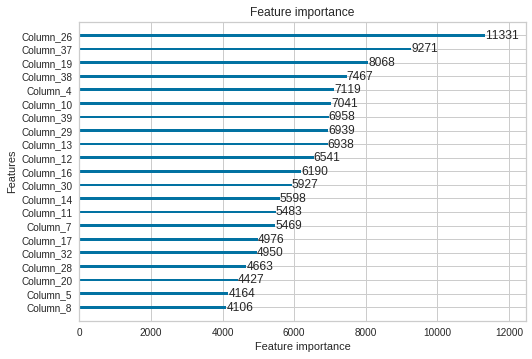

In [158]:
#Plot Variable Importances
lgb.plot_importance(lgbm, max_num_features=21, importance_type='split')

In [0]:
cv_results = lgb.cv(
        params,
        train_data,
        num_boost_round=100,
        nfold=5,
        early_stopping_rounds=10,
        # This is what I added
        stratified=True,
        )

In [31]:
cv_results

{'multi_logloss-mean': [0.9493118484588257,
  0.8694208047868383,
  0.8016669675022682,
  0.7429097701121135,
  0.6923295907865545,
  0.648559116647397,
  0.6094011153173488,
  0.5756007394101642,
  0.5460015586046412,
  0.5195975007012248,
  0.4955854123561177,
  0.4745207285695008,
  0.4548103358151424,
  0.43730256674039164,
  0.42239669643059985,
  0.4089988940480521,
  0.39602465601518133,
  0.38397902678034856,
  0.37376808361528335,
  0.3636061881503541,
  0.35458680342067245,
  0.34658078122676095,
  0.33937821658136413,
  0.33321851725241175,
  0.3275885873722468,
  0.3225336826611004,
  0.31772452234630827,
  0.31347681652747134,
  0.3096266489978301,
  0.30546400515619787,
  0.3027418004470264,
  0.3003754427666818,
  0.2976405105759038,
  0.2945532754360144,
  0.2933034111230569,
  0.29132536369980516,
  0.29019039186557816,
  0.28952760814828654,
  0.28857738173137937,
  0.28804283947628234,
  0.2874314963387813,
  0.2866787213855043],
 'multi_logloss-stdv': [0.00169574973

# Save the Model

In [0]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'LightGBM.sav'
joblib.dump(model, filename)

['LightGBM.sav']